In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


### Global parameters

In [2]:
h  = 2
gamma = 1.0/30
beta = 1.0/10
#normal rate of growth, about onces every 20 mins
phi = 1.0/20.0
# penalty for having plasmids, small number, eyeballed
c = 0.01
# eyeballed parameter, kill them every ? mins
gammaB = 1/20000



### Equations

#### Bacteria

Well define the behaviour of bacteria in the following way:

$$\dot{B_i} = r_i(n_i) - \gamma_B \sum_i B_i$$

$$r_i(n_i) = \Phi(1-c\cdot n_i)$$

In [4]:
def r(ki):
    return phi*(1-c*nss(ki))
def bplus(ki):
    return r(ki)
def bminus(b1,b2):
    return gammaB*(b1+b2)

We can also find the steady state for when there is only one type of cell:

$$\dot{B_i} = 0 \Rightarrow r_i(n_i) = \gamma_B B_i$$

$$ \Phi(1-cn_i) = \gamma_B B_i$$

$$B_{ss} = \frac{\Phi(1-cn_{ss})}{\gamma_B} $$

In [5]:
def nss(k):
    return k*(beta/gamma -1 )**(1/h)
def bss(nss):
    return phi*(1-c*nss)/gammaB

### Simulation

Gillespie functions

In [8]:
def tau(s,r):
    return np.log(1/r)/s

def events(b1,b2,k1,k2):
    return [bplus(k1),bminus(b1,b2),bplus(k2),bminus(b1,b2)]

def action(b1_list,b2_list,events,r):
    normedEvents = np.array(events)/sum(events)
    normedEvents = np.cumsum(normedEvents)
  
    if(r<normedEvents[0]):
        
        b1_list.append(b1_list[-1]+1)
        b2_list.append(b2_list[-1])
        
    elif(r<normedEvents[1]):

        if(b1_list[-1]>0):
            b1_list.append(b1_list[-1]-1)
        else:
            b1_list.append(b1_list[-1])
        b2_list.append(b2_list[-1])
        
    elif(r<normedEvents[2]):
   
        b1_list.append(b1_list[-1])
        b2_list.append(b2_list[-1]+1)
        
    else:
 
        b1_list.append(b1_list[-1])
        if(b2_list[-1]>0):
            b2_list.append(b2_list[-1]-1)
        else:
            b2_list.append(b2_list[-1])

    

### Single cell simulation

In [24]:
def sim1Cell(k1,k2):
    b1 = [5.0]
    b2 = [5.0]
    t = [0.0]

    totT = 100000
    while(t[-1]<totT):


        r1= np.random.random()

        eventsNow = events(b1[-1],b2[-1],k1,k2)

        t.append(t[-1]+tau(sum(eventsNow),r1))

        r2 = np.random.random()
        action(b1,b2,eventsNow,r2)
    return t,b1,b2
    

### Multiple cell simulation

In [25]:
def multiSim(k1,k2,N=400):
    b1s = []
    b2s = []
    ts= []


    for i in range(N):
        print('\r'+"{:.2f}".format(i*100/N),end='')
        t,b1,b2=sim1Cell(k1,k2)
        
        b1s.append(b1)
        b2s.append(b2)
        ts.append(t)
    return ts,b1s,b2s

### Multiple cell simulation and plot 

In [29]:
def simAndPlot(ks):
    fig = plt.figure(figsize=(30,6*len(ks)))
    for w,kk in enumerate(ks):
        k1 = kk[0]
        k2 = kk[1]
        print()
        print(k1,k2)
        
        ts,b1s,b2s = multiSim(k1,k2)
        
        lastb1= []
        lastb2 = []
         
        #bacteria over time
        
        plt.subplot(len(ks),2,w*2+1)
        for i in range(len(ts)):
            lastb1.append(b1s[i][-1])
            lastb2.append(b2s[i][-1])
            plt.plot(ts[i],b1s[i],color='red'  ,alpha=0.2)
            plt.plot(ts[i],b2s[i],color='black',alpha=0.2)

        plt.plot(ts[0],b1s[0],color='red'  ,label = 'b1',alpha=0.2)
        plt.plot(ts[0],b2s[0],color='black',label = 'b2',alpha=0.2)
        plt.xlabel('time (mins)')
        plt.ylabel('# of bacteria')
        plt.legend()
        plt.title('k1 = {} k2 = {}'.format(k1,k2))
        
        #bacteria histograms
        plt.subplot(len(ks),2,w*2+2)

        nbins = np.linspace(0,1000,40)
        plt.hist(lastb1,bins=nbins,alpha = 0.5,color = 'red'  ,label = 'b1',density=True)
        plt.hist(lastb2,bins=nbins,alpha = 0.5,color = 'black',label = 'b2',density=True)
        plt.plot([bss(nss(k1)),bss(nss(k1))],[0,0.15],linestyle='--',color = 'red',label='n1 steady state')
        plt.plot([bss(nss(k2)),bss(nss(k2))],[0,0.15],linestyle='--',color = 'black',label='n2 steady state')
        plt.xlabel("# of bacteria")
        plt.ylabel("frequency")
        plt.legend()
        plt.title('k1 = {} k2 = {}'.format(k1,k2))
        
        
        plt.savefig('segundaEtapa.png')
        

In [27]:
bss(nss(10))

858.5786437626906


10 50
99.75
20 40
99.75
30 30
99.75
40 20
99.75
50 10
99.75

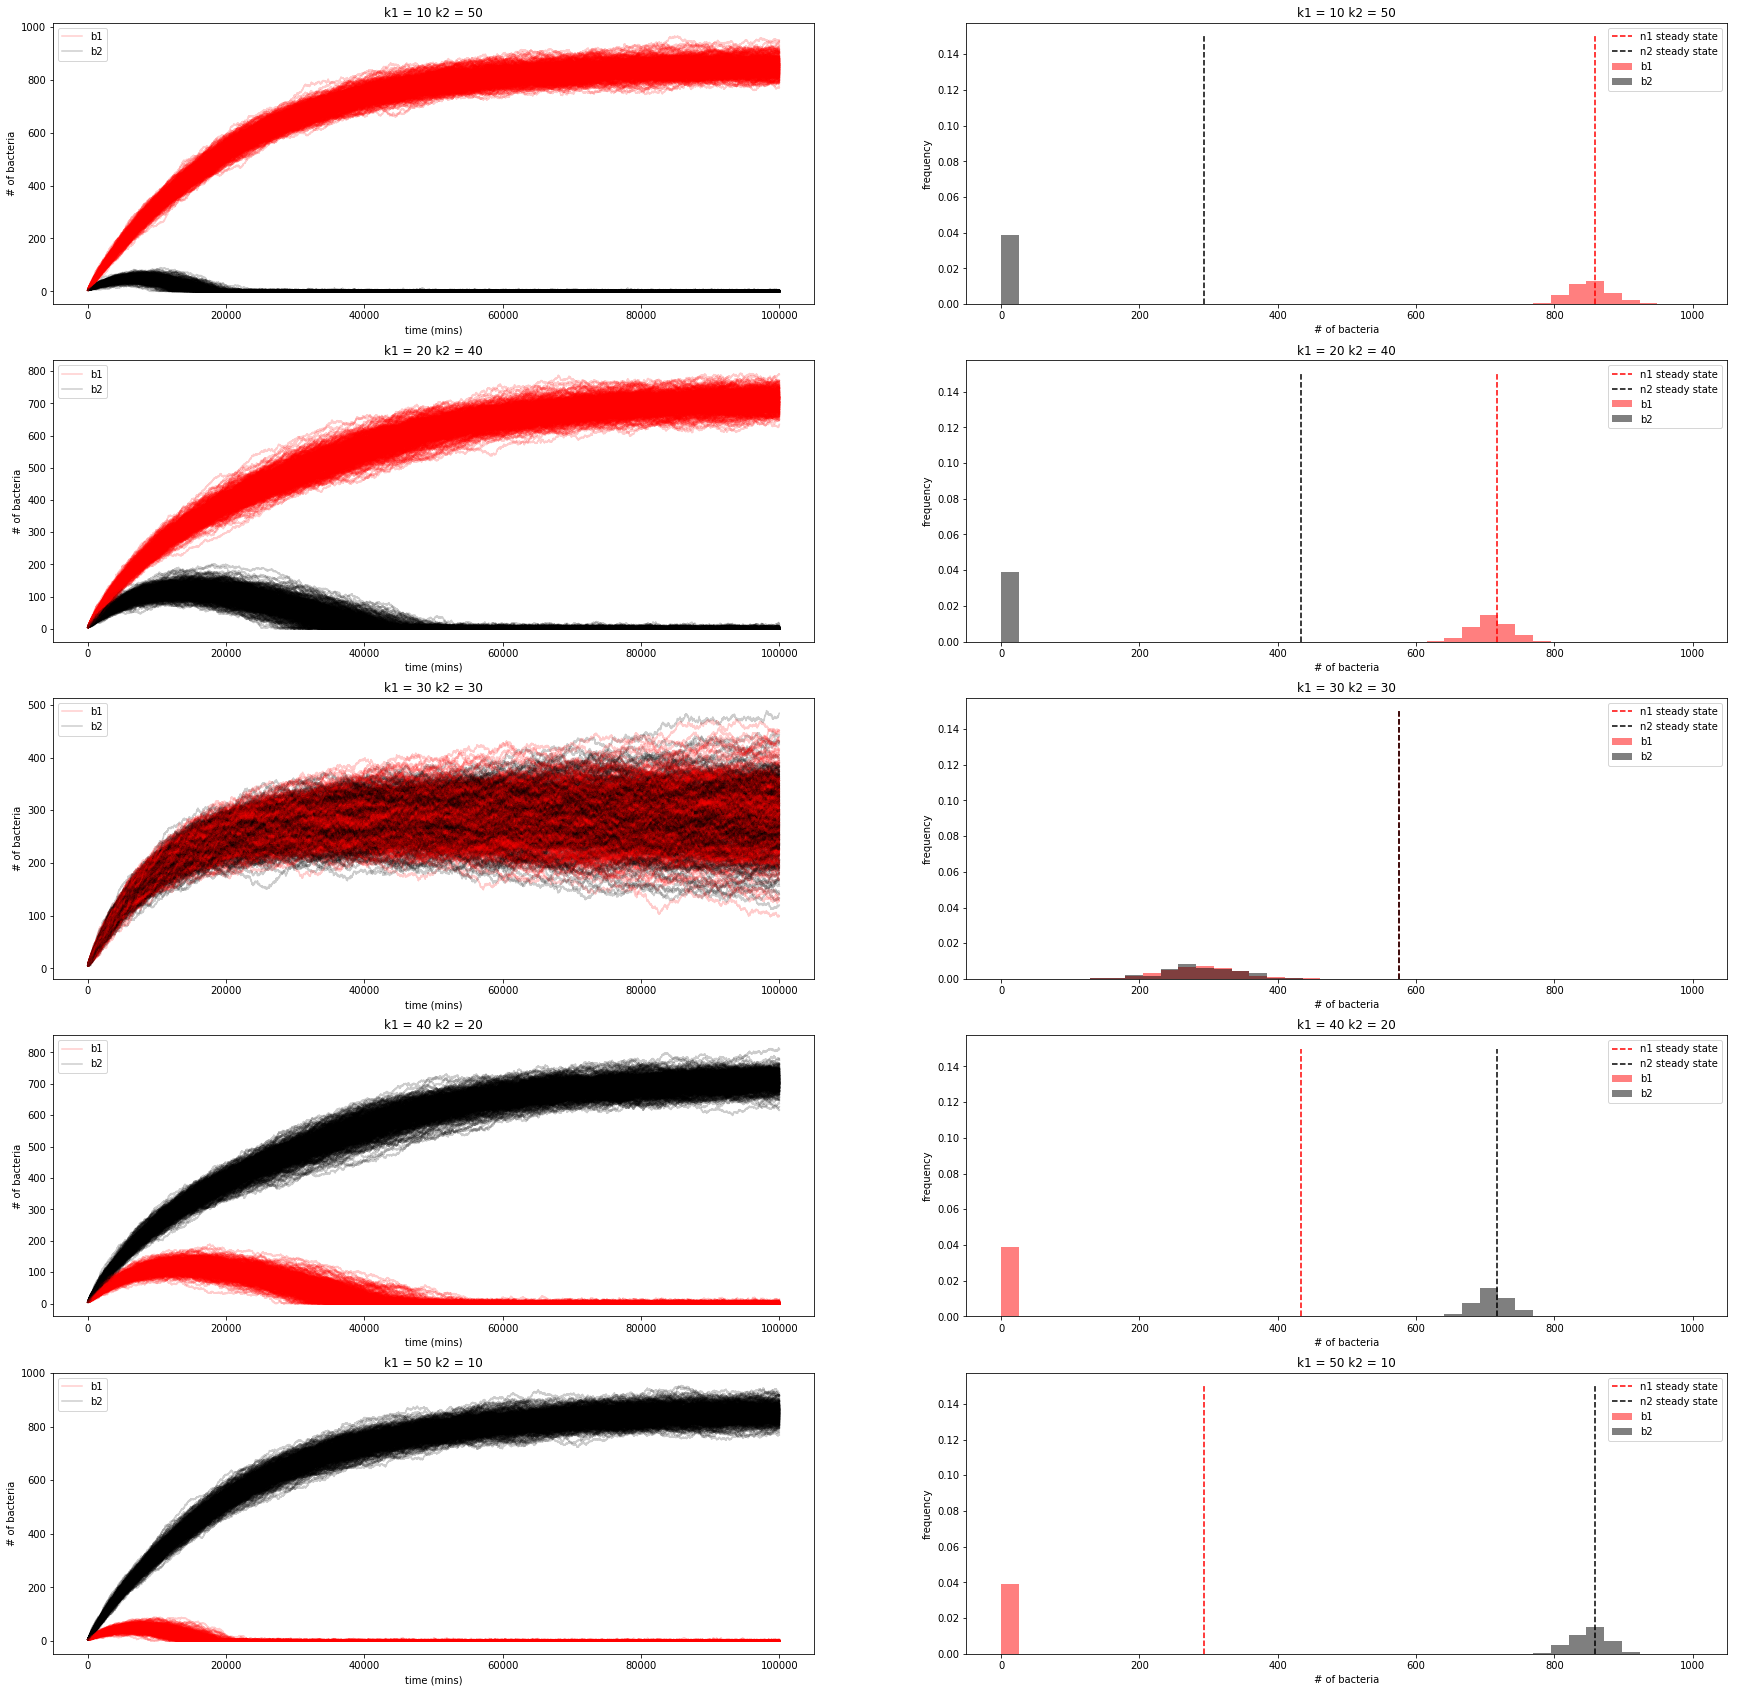

In [30]:
simAndPlot([[10,50],[20,40],[30,30],[40,20],[50,10]])